# **Đọc Dữ Liệu Sau Tiền Xử Lý**

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

warnings.filterwarnings('ignore')

In [ ]:
#Import dữ liệu
from google.colab import drive
drive.mount('/content/drive')

df = pd.read_excel('/content/drive/MyDrive/DataFlow/final.xlsx')

Mounted at /content/drive


In [ ]:
df.duplicated().sum()

0

In [ ]:
#Chuyển cột Date về dạng datetime
df["Date"] =pd.to_datetime(df["Date"])

#Thêm các cột về thời gian
df["Year"] = df["Date"].dt.year
df["Month"] = df["Date"].dt.month
df["Quarter"] = df["Date"].dt.quarter
df["DayOfWeek"] = df["Date"].dt.dayofweek

In [ ]:
#Tính các metrics kinh doanh
df["Profit"] = df["Revenue"] - df["COGS"]
df["Profit_Margin"] = (df["Profit"] / df["Revenue"]) * 100
df["Revenue_Per_Unit"] = df["Revenue"] / df["Units"]
df["COGS_Per_Unit"] = df["COGS"] / df["Units"]

In [ ]:
print("===Thông tin về bộ dữ liệu sau khi đã xử lý===")
df.info()

===Thông tin về bộ dữ liệu sau khi đã xử lý===
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 976243 entries, 0 to 976242
Data columns (total 22 columns):
 #   Column            Non-Null Count   Dtype         
---  ------            --------------   -----         
 0   Unnamed: 0        976243 non-null  int64         
 1   ProductID         976243 non-null  int64         
 2   Date              976243 non-null  datetime64[ns]
 3   Zip               976243 non-null  int64         
 4   Units             976243 non-null  int64         
 5   Revenue           976243 non-null  float64       
 6   COGS              976243 non-null  float64       
 7   Category          976243 non-null  object        
 8   Segment           976243 non-null  object        
 9   Product           976243 non-null  object        
 10  City              976243 non-null  object        
 11  State             976243 non-null  object        
 12  Region            976243 non-null  object        
 13  District    

In [ ]:
df.head()

,Unnamed: 0,ProductID,Date,Zip,Units,Revenue,COGS,Category,Segment,Product,...,Region,District,Year,Month,Quarter,DayOfWeek,Profit,Profit_Margin,Revenue_Per_Unit,COGS_Per_Unit
0,0,1228,2013-07-31,78773,12,19648.44,12309.747660,Urban,Convenience,Pirum UC-30,...,Central,District #23,2013,7,3,2,7338.692340,37.35,1637.37,1025.812305
1,1,781,2014-03-12,90501,16,20351.52,13497.128064,Rural,Productivity,Natura RP-69,...,West,District #37,2014,3,1,2,6854.391936,33.68,1271.97,843.570504
2,2,2090,2013-11-29,44460,26,111367.62,91488.499830,Urban,Convenience,Currus UC-25,...,East,District #14,2013,11,4,4,19879.120170,17.85,4283.37,3518.788455
3,3,1116,2018-08-29,30122,12,36280.44,21967.806420,Rural,Select,Pirum RS-04,...,East,District #09,2018,8,3,2,14312.633580,39.45,3023.37,1830.650535
4,4,993,2013-04-27,75789,14,55557.18,48645.866808,Urban,Convenience,Natura UC-56,...,Central,District #24,2013,4,2,5,6911.313192,12.44,3968.37,3474.704772


## Phân tích sơ lược bộ dữ liệu

- Dữ liệu bao gồm thông tin từ 2013 đến 2022
- Mỗi bản ghi chứa thông tin về doanh số bán hàng (Units), doanh thu (Revenue) và giá vốn (COGS)
- Dữ liệu được phân chia theo địa lý (Zip, City, State, Region, District)
- Sản phẩm được phân loại theo Category , Segment

# **Phân Tích Doanh Thu Và Số Lượng Bán Theo Thời Gian**

## Trực quan hóa doanh thu và số lượng bán theo năm

=== 1. Phân tích xu hướng theo năm ===

Xu hướng theo năm:
           Revenue        Profit   Units  Profit_Margin
Year                                                   
2010  2.104365e+08  3.963802e+07   48424          19.31
2011  5.199015e+08  9.482299e+07  114179          18.99
2012  5.508145e+08  9.972760e+07  117427          18.71
2013  5.942496e+08  1.086217e+08  120105          19.32
2014  6.356110e+08  1.095933e+08  117966          18.74
2015  6.124530e+08  1.088007e+08  108870          18.84
2016  5.640998e+08  1.047611e+08   97521          19.22
2017  3.704278e+08  6.750575e+07   58485          18.80
2018  3.272709e+08  5.962596e+07   48431          18.68
2019  3.453526e+08  5.775407e+07   48107          17.57
2020  3.659085e+08  5.575591e+07   49359          16.75
2021  3.830445e+08  5.508202e+07   49235          16.22
2022  2.189805e+08  2.659226e+07   27401          14.84

Tốc độ tăng trưởng hàng năm:
      Revenue  Profit   Units  Profit_Margin
Year                      

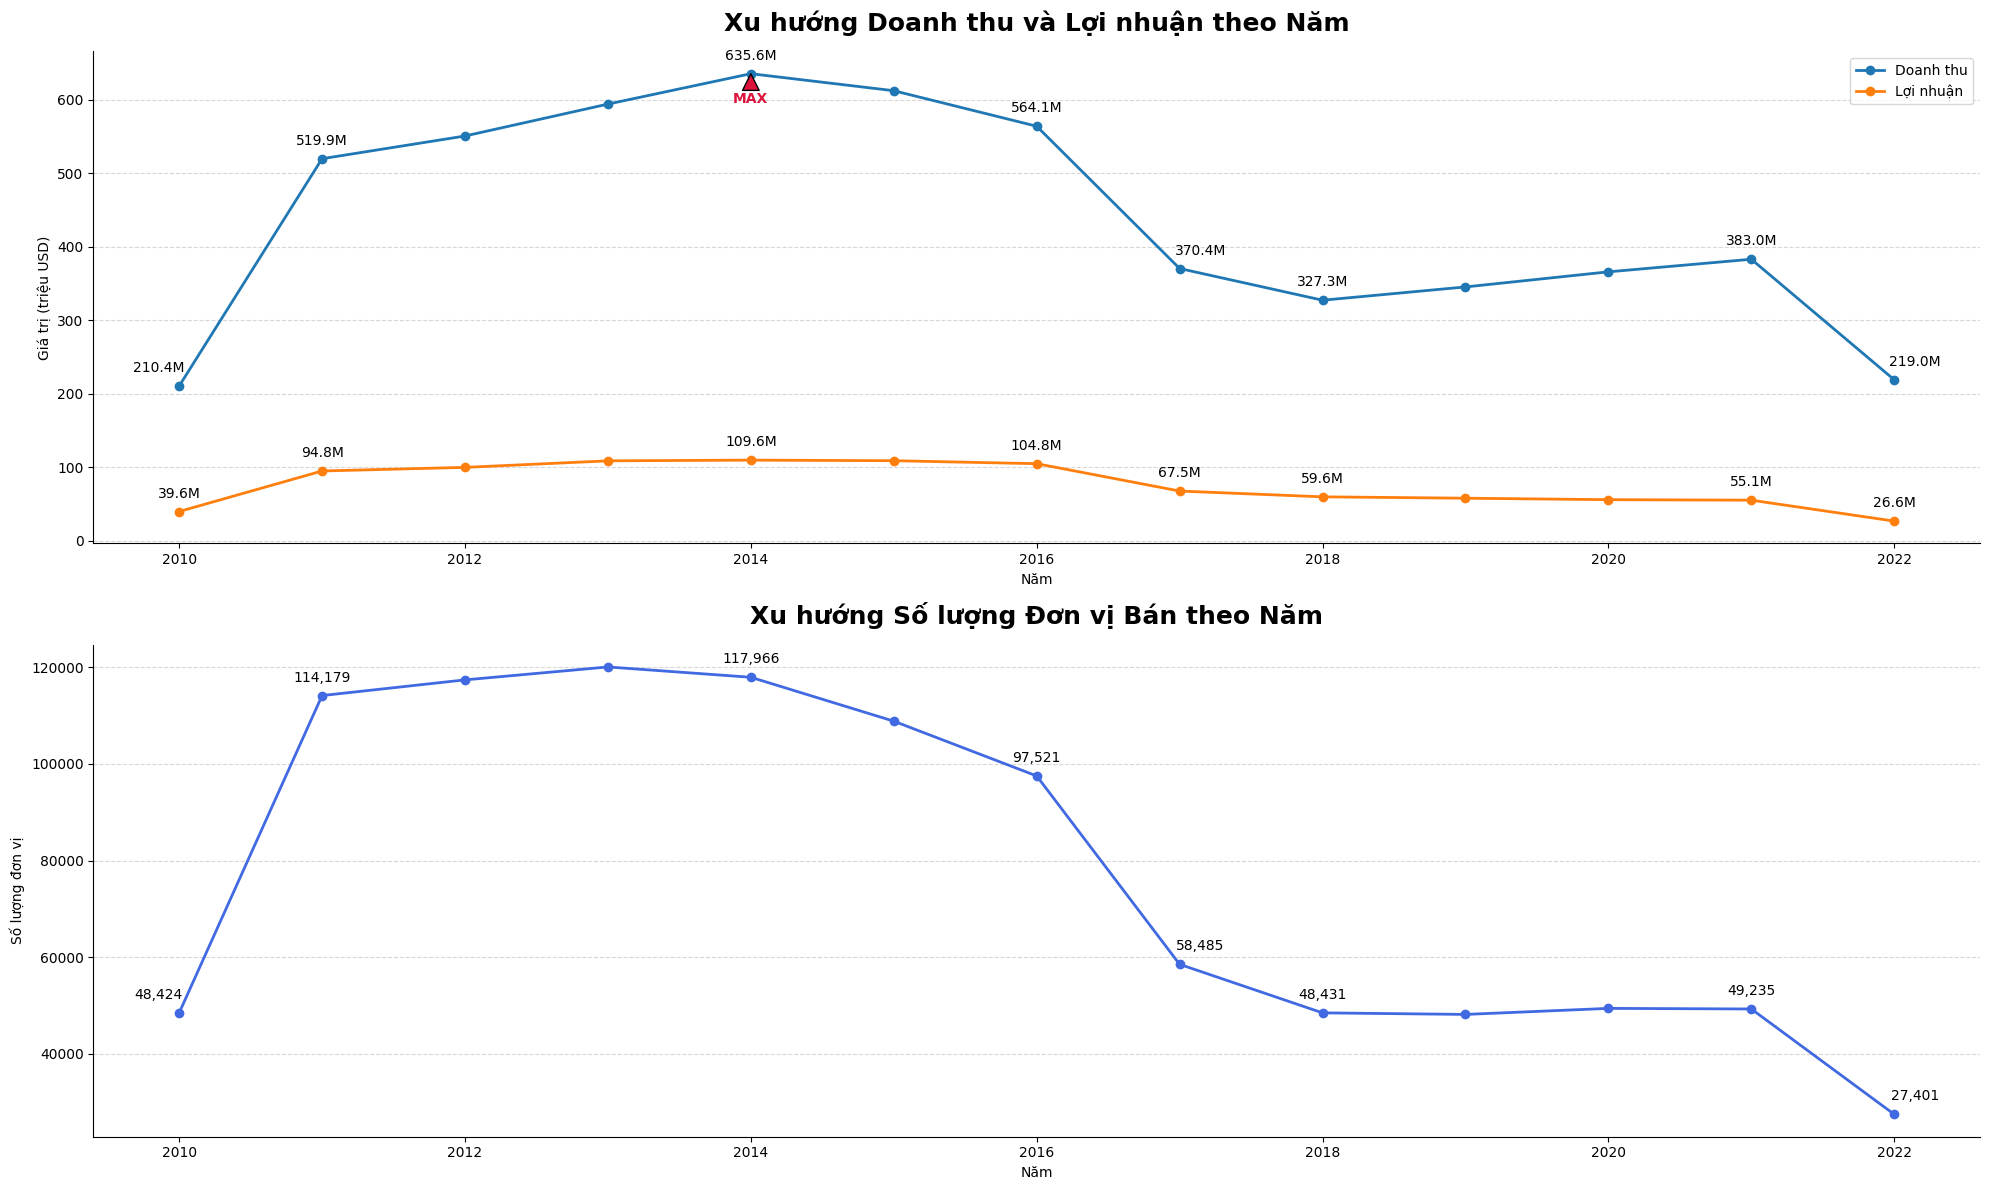

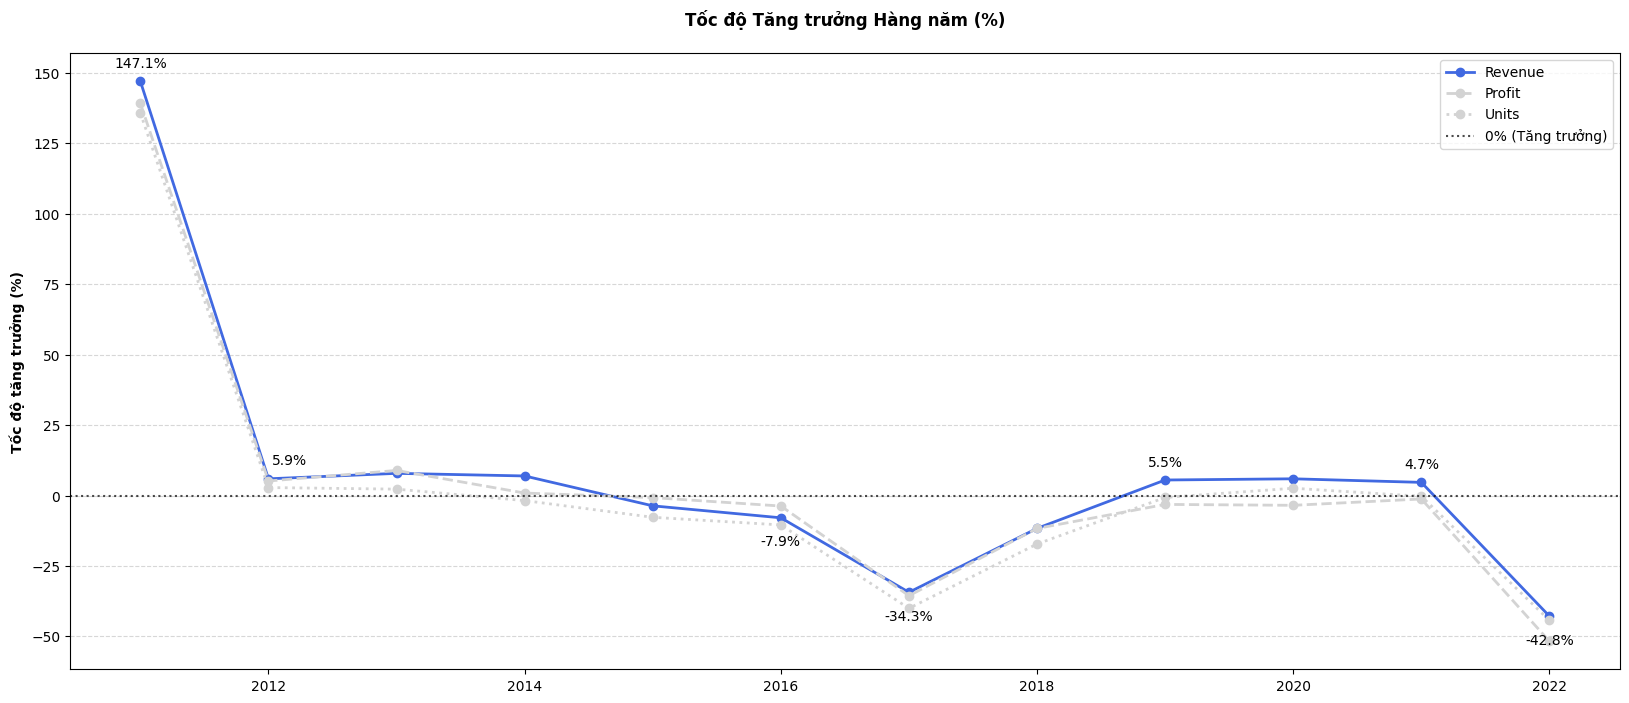

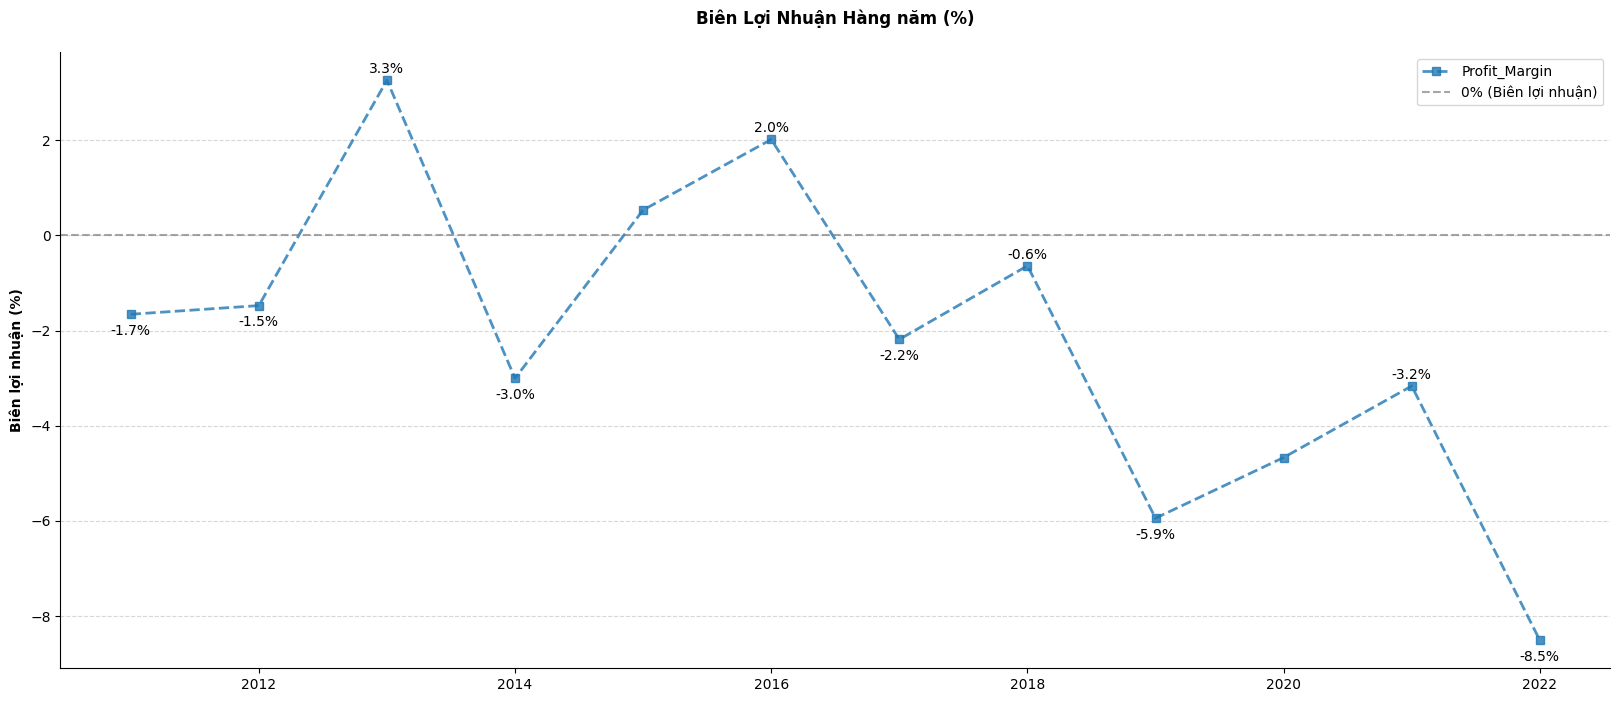

In [ ]:
yearly_metrics = (
    df.groupby("Year")
    .agg({"Revenue": "sum", "Profit": "sum", "Units": "sum", "Profit_Margin": "mean"})
    .round(2)
)

# In ra số liệu chi tiết
print("=== 1. Phân tích xu hướng theo năm ===")
print("\nXu hướng theo năm:")
print(yearly_metrics)

# Tính tốc độ tăng trưởng
growth_metrics = yearly_metrics.pct_change() * 100
print("\nTốc độ tăng trưởng hàng năm:")
print(growth_metrics.round(2))

# Vẽ biểu đồ xu hướng với annotation
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(20, 12))

# Vẽ biểu đồ doanh thu và lợi nhuận với annotation
ax1.plot(
    yearly_metrics.index,
    yearly_metrics["Revenue"],
    marker="o",
    linewidth=2,
    label="Doanh thu",
)
ax1.plot(
    yearly_metrics.index,
    yearly_metrics["Profit"],
    marker="o",
    linewidth=2,
    label="Lợi nhuận",
)



# Chỉ chú thích một số năm nhất định
selected_years = [2010, 2011, 2014, 2016, 2017, 2018, 2021, 2022]  # Danh sách năm cần chú thích


# Thêm annotation cho doanh thu và lợi nhuận
for x, y in zip(yearly_metrics.index, yearly_metrics["Revenue"]):
    if x in selected_years:
        offset_x = -15 if x == 2010 else (15 if x in [2017,2022] else 0)  # Chếch sang trái, phải nếu là 2010 hoặc 2014
        ax1.annotate(f"{y / 1e6:.1f}M",
        (x, y),
        textcoords="offset points",
        xytext=(offset_x, 10),
        ha="center")

for x, y in zip(yearly_metrics.index, yearly_metrics["Profit"]):
    if x in selected_years:
        ax1.annotate(f"{y / 1e6:.1f}M",
        (x, y), textcoords="offset points",
        xytext=(0, 10),
        ha="center")



max_revenue_year = yearly_metrics["Revenue"].idxmax()
max_revenue = yearly_metrics["Revenue"].max()
ax1.annotate(
    f"MAX",
    xy=(max_revenue_year, max_revenue),
    xytext=(max_revenue_year, max_revenue - 40000000),
    arrowprops=dict(facecolor="crimson", shrink=1),
    ha="center",
    color = 'crimson',
    fontweight = 'bold'
)

ax1.set_title("Xu hướng Doanh thu và Lợi nhuận theo Năm", pad=15, fontweight = 'bold', fontsize = 18)
ax1.set_xlabel("Năm")
ax1.set_ylabel("Giá trị (triệu USD)")
ax1.set_yticklabels([f"{int(tick/1000000):,}" for tick in ax1.get_yticks()])
ax1.legend()
ax1.grid(axis="y", linestyle="--", alpha=0.5)

# Vẽ biểu đồ số lượng đơn vị bán với annotation
ax2.plot(
    yearly_metrics.index,
    yearly_metrics["Units"],
    marker="o",
    linewidth=2,
    color="royalblue",
)
for x, y in zip(yearly_metrics.index, yearly_metrics["Units"]):
    if x in selected_years:
      offset_x = -15 if x == 2010 else (15 if x in [2017,2022] else 0)  # Chếch sang trái, phải nếu là 2010 hoặc 2014
      ax2.annotate(
          f"{y:,.0f}", (x, y), textcoords="offset points", xytext=(offset_x, 10), ha="center"
      )

ax2.set_title("Xu hướng Số lượng Đơn vị Bán theo Năm", pad=15, fontweight = 'bold', fontsize = 18)
ax2.set_xlabel("Năm")
ax2.set_ylabel("Số lượng đơn vị")
ax2.grid(axis="y", linestyle="--", alpha=0.5)

# Bỏ cạnh trên và cạnh phải của biểu đồ
ax1.spines["top"].set_visible(False)
ax1.spines["right"].set_visible(False)
ax2.spines["top"].set_visible(False)
ax2.spines["right"].set_visible(False)


plt.tight_layout()
plt.show()


# Danh sách các năm quan trọng cần annotate
important_years = [2011, 2012, 2016, 2017, 2019, 2021, 2022]

# Biểu đồ tốc độ tăng trưởng
fig, ax1 = plt.subplots(figsize=(20, 8))
colors = {"Revenue": "royalblue", "Profit": "lightgray", "Units": "lightgray"}
linestyles = {"Revenue": "-", "Profit": "--", "Units": ":"}

for metric in ["Revenue", "Profit", "Units"]:
    ax1.plot(
        growth_metrics.index,
        growth_metrics[metric],
        marker="o",
        linewidth=2,
        linestyle=linestyles[metric],
        color=colors[metric],
        label=metric,
    )

# Annotation chỉ cho các năm quan trọng
for year in important_years:
    value = growth_metrics.loc[year, "Revenue"]
    offset_x = 15 if year == 2012 else 0
    offset_y = -20 if value < 0 else 10
    ax1.annotate(
        f"{value:.1f}%",
        (year, value),
        textcoords="offset points",
        xytext=(offset_x, offset_y),
        ha="center",
        fontsize=10,
        color="black",
    )

ax1.axhline(0, color="black", linewidth=1.5, linestyle=":", alpha=0.7, label="0% (Tăng trưởng)")
ax1.set_title("Tốc độ Tăng trưởng Hàng năm (%)", pad=20, fontweight="bold")
ax1.set_ylabel("Tốc độ tăng trưởng (%)", fontweight = 'bold')
ax1.grid(axis="y", linestyle="--", alpha=0.5)
ax1.legend()
plt.show()

# Biểu đồ biên lợi nhuận
fig, ax2 = plt.subplots(figsize=(20, 8))
ax2.plot(
    growth_metrics.index,
    growth_metrics["Profit_Margin"],
    marker="s",
    linewidth=2,
    linestyle="--",
    label="Profit_Margin",
    alpha=0.8,
)

ax2.axhline(0, color="gray", linewidth=1.5, linestyle="--", alpha=0.7, label="0% (Biên lợi nhuận)")

important_years2 = [2010, 2011, 2012, 2013, 2014, 2016, 2017, 2018, 2019, 2021, 2022]

# Annotation chỉ cho các năm quan trọng
for year in important_years2:
    value = growth_metrics.loc[year, "Profit_Margin"]
    offset_y = 5 if year in [2018, 2021] else (-15 if value < 0 else 5)
    ax2.annotate(
        f"{value:.1f}%",
        (year, value),
        textcoords="offset points",
        xytext=(0, offset_y),
        ha="center",
        fontsize=10,
        color="black",
    )

ax2.set_title("Biên Lợi Nhuận Hàng năm (%)", pad=20, fontweight="bold")
ax2.set_ylabel("Biên lợi nhuận (%)", fontweight = 'bold')
ax2.grid(axis="y", linestyle="--", alpha=0.5)
ax2.legend()


ax1.spines["top"].set_visible(False)
ax1.spines["right"].set_visible(False)
ax2.spines["top"].set_visible(False)
ax2.spines["right"].set_visible(False)

plt.show()




## Trực quan hóa xu hướng doanh thu và số lượng bán theo quý và tháng


=== 2. Phân tích theo quý ===

Thống kê theo quý:
                   Revenue       Profit  Units  Profit_Margin
Year Quarter                                                 
2010 3        1.185376e+08  22893698.41  24737          19.52
     4        9.189888e+07  16744317.47  23687          19.09
2011 1        1.010592e+08  18402525.83  21280          18.74
     2        1.743700e+08  32185148.29  37000          19.22
     3        1.517744e+08  27029730.07  31128          18.78
     4        9.269793e+07  17205585.27  24771          19.10
2012 1        1.051871e+08  18711315.33  22061          18.48
     2        1.985615e+08  35177613.08  40463          18.51
     3        1.467624e+08  26712437.30  29943          18.67
     4        1.003035e+08  19126231.14  24960          19.28
2013 1        1.081490e+08  20420524.44  21293          19.50
     2        2.118101e+08  39960468.26  40723          19.28
     3        1.629329e+08  29016015.85  31768          18.94
     4        1.113

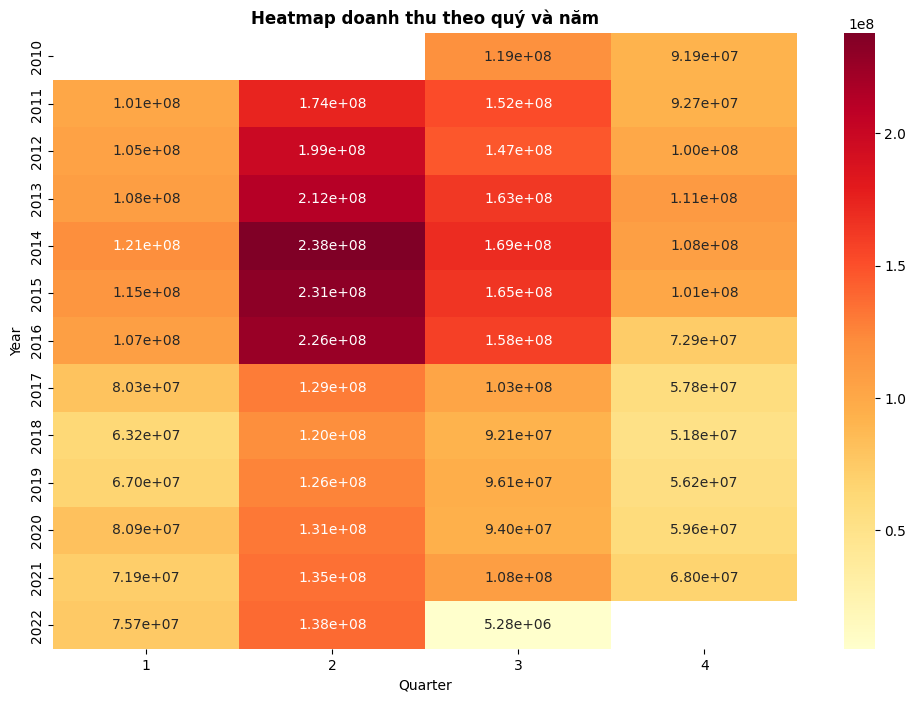

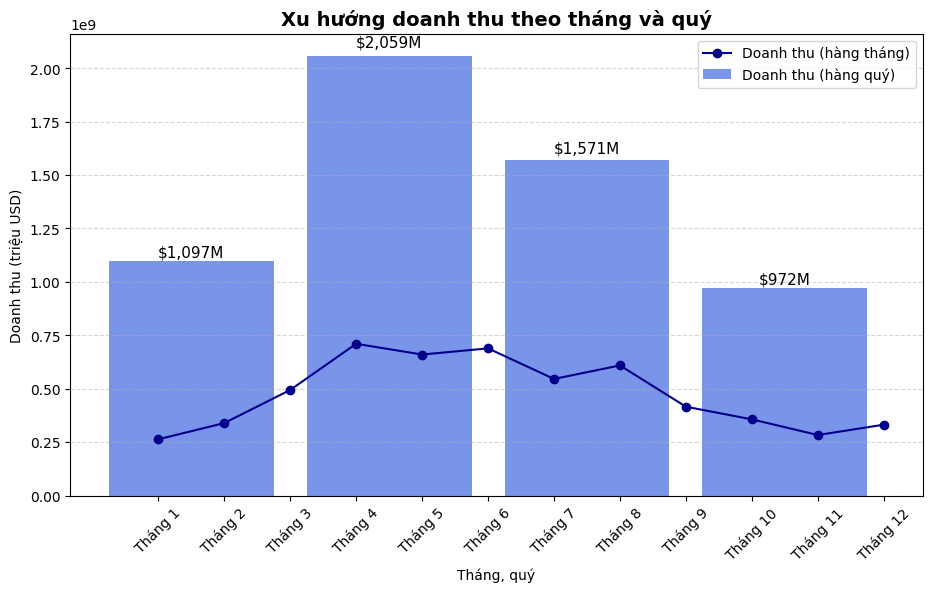

In [ ]:
# 1.2 Phân tích theo Quý và Tháng

# Heatmap
quarterly_metrics = (
    df.groupby(["Year", "Quarter"])
    .agg({"Revenue": "sum", "Profit": "sum", "Units": "sum", "Profit_Margin": "mean"})
    .round(2)
)

print("\n=== 2. Phân tích theo quý ===")
print("\nThống kê theo quý:")
print(quarterly_metrics)

# Tạo heatmap cho doanh thu theo quý với annotation
quarterly_pivot = quarterly_metrics.reset_index().pivot(
    index="Year", columns="Quarter", values="Revenue"
)
plt.figure(figsize=(12, 8))
sns.heatmap(quarterly_pivot, annot=True, fmt=".2e", cmap="YlOrRd")
plt.title("Heatmap doanh thu theo quý và năm", fontweight = 'bold')
plt.show()




# Biểu đồ kết hợp cho doanh thu
# Nhóm dữ liệu theo tháng và quý
monthly_data = df.groupby("Month")["Revenue"].sum()
quarterly_data = df.groupby("Quarter")["Revenue"].sum()


fig, ax = plt.subplots(figsize=(11, 6))

# Vẽ biểu đồ cột cho doanh thu theo quý
quarters = ["Q1", "Q2", "Q3", "Q4"]
quarter_positions = [1.5, 4.5, 7.5, 10.5]  # Trung tâm của mỗi quý
ax.bar(quarter_positions, quarterly_data, width=2.5, color="royalblue", alpha=0.7, label="Doanh thu (hàng quý)")

# Hiển thị giá trị trên các cột
for pos, rev in zip(quarter_positions, quarterly_data):
    rev_millions = rev / 1e6
    ax.text(pos, rev + 0.02 * rev, f'${rev_millions:,.0f}M', ha='center', fontsize=11, color='black')

# Vẽ đường cho doanh thu theo tháng
ax.plot(range(1, 13), monthly_data, marker="o", linestyle="-", color="darkblue", label="Doanh thu (hàng tháng)")

ax.set_ylabel("Doanh thu (triệu USD)")
ax.set_xlabel("Tháng, quý")
ax.set_xticks(range(1, 13))
ax.set_xticklabels(["Tháng 1", "Tháng 2", "Tháng 3", "Tháng 4", "Tháng 5", "Tháng 6", "Tháng 7", "Tháng 8", "Tháng 9", "Tháng 10", "Tháng 11", "Tháng 12"], rotation=45)
ax.set_title("Xu hướng doanh thu theo tháng và quý", fontweight = 'bold', fontsize = 14)
ax.legend()
ax.grid(axis="y", linestyle="--", alpha=0.5)















## **Nhận xét**

### 1. Tổng quan
- Theo năm : Doanh thu tăng trưởng ổn định từ 2010 - 2014, sụt giảm mạnh từ 2014 - 2018, sau đó chững lại do đại dịch và tiếp tục giảm ở năm 2022.
- Theo tháng và quý: Quý 2 (đặc biệt là từ tháng 4 - tháng 6) có doanh số cao nhất do các sự kiện mua sắm lớn trong hè, sau đó giảm dần về cuối năm.

### 2. Phân tích chi tiết theo giai đoạn

- Giai đoan 2010 - 2014 : Tăng trưởng mạnh mẽ

     - Doanh thu tăng từ 210M lên 635M USD (tăng trưởng đột phá 147.06% năm 2011)
     - Số lượng đơn vị bán tăng từ 48K lên 117K (tăng trưởng đồng bộ với doanh thu)
     - Động lực tăng trưởng: phục hồi sau khủng hoảng kinh tế, sự bùng nổ của thương mại điện tử và thời trang nhanh, thị trường mở rộng.

- Giai đoạn 2015-2018 : Sụt giảm mạnh

     - Doanh thu giảm từ 612M xuống 327M USD (giảm mạnh nhất -34.33% năm 2017)
     - Số lượng đơn vị bán giảm từ 108K xuống 48K (giảm mạnh nhất -40.03% năm 2017)
     - Nguyên nhân : suy thoái của các ngành bán lẻ truyền thống, thị trường bão hòa, quản lý yếu kém và mở rộng quá nhanh

- Giai đoạn 2019 - 2020 : Chững lại

    - Doanh thu hênh lệch 1%/ năm
    - Nguyên nhân: đại dịch Covid, xu hướng tiêu dùng thay đổi, cạnh tranh gay gắt

- Giải đoạn 2021 - 2022 : Tiếp tục sụt giảm

    - Doanh thu giảm -42% so với năm 2020
    - Nguyên nhân : hậu quả của đại dịch Covid, lạm phát cao, chiến tranh Nga - Ukraina ảnh hưởng đến kinh tế toàn câu


- Tính mùa vụ rõ rệt:

     - Quý 2 ( đặc biệt là từ tháng 4 - tháng 6 )luôn là mùa cao điểm với doanh thu cao nhất (khoảng 35-40% doanh thu năm) do là mùa cao điểm của các sự kiện mua sắm
     - Quý 4 thường có doanh thu thấp nhất do bước vào kì nghỉ đông, ít các hoạt động mua sắm
     - Xu hướng mùa vụ duy trì ổn định qua các năm




=== 3. Phân tích theo khu vực và danh mục ===

Thống kê theo khu vực và danh mục:
                       Revenue        Profit   Units  Profit_Margin
Region  Category                                                   
Central Mix       3.827766e+07  4.382631e+06    8408           9.34
        Rural     1.912077e+08  3.668693e+07   86119          20.28
        Urban     1.456640e+09  2.435617e+08  172058          17.38
        Youth     3.427368e+07  7.880610e+06   17063          24.46
East    Mix       6.237408e+07  7.407099e+06   13551          10.03
        Rural     2.998459e+08  5.733619e+07  139675          20.08
        Urban     2.233842e+09  3.800596e+08  275170          17.56
        Youth     5.485307e+07  1.175688e+07   24650          23.35
West    Mix       6.852829e+07  8.020311e+06   14489           9.63
        Rural     3.259492e+08  6.526603e+07  128312          20.53
        Urban     9.057968e+08  1.602465e+08  114015          17.88
        Youth     2.696194e+07  5

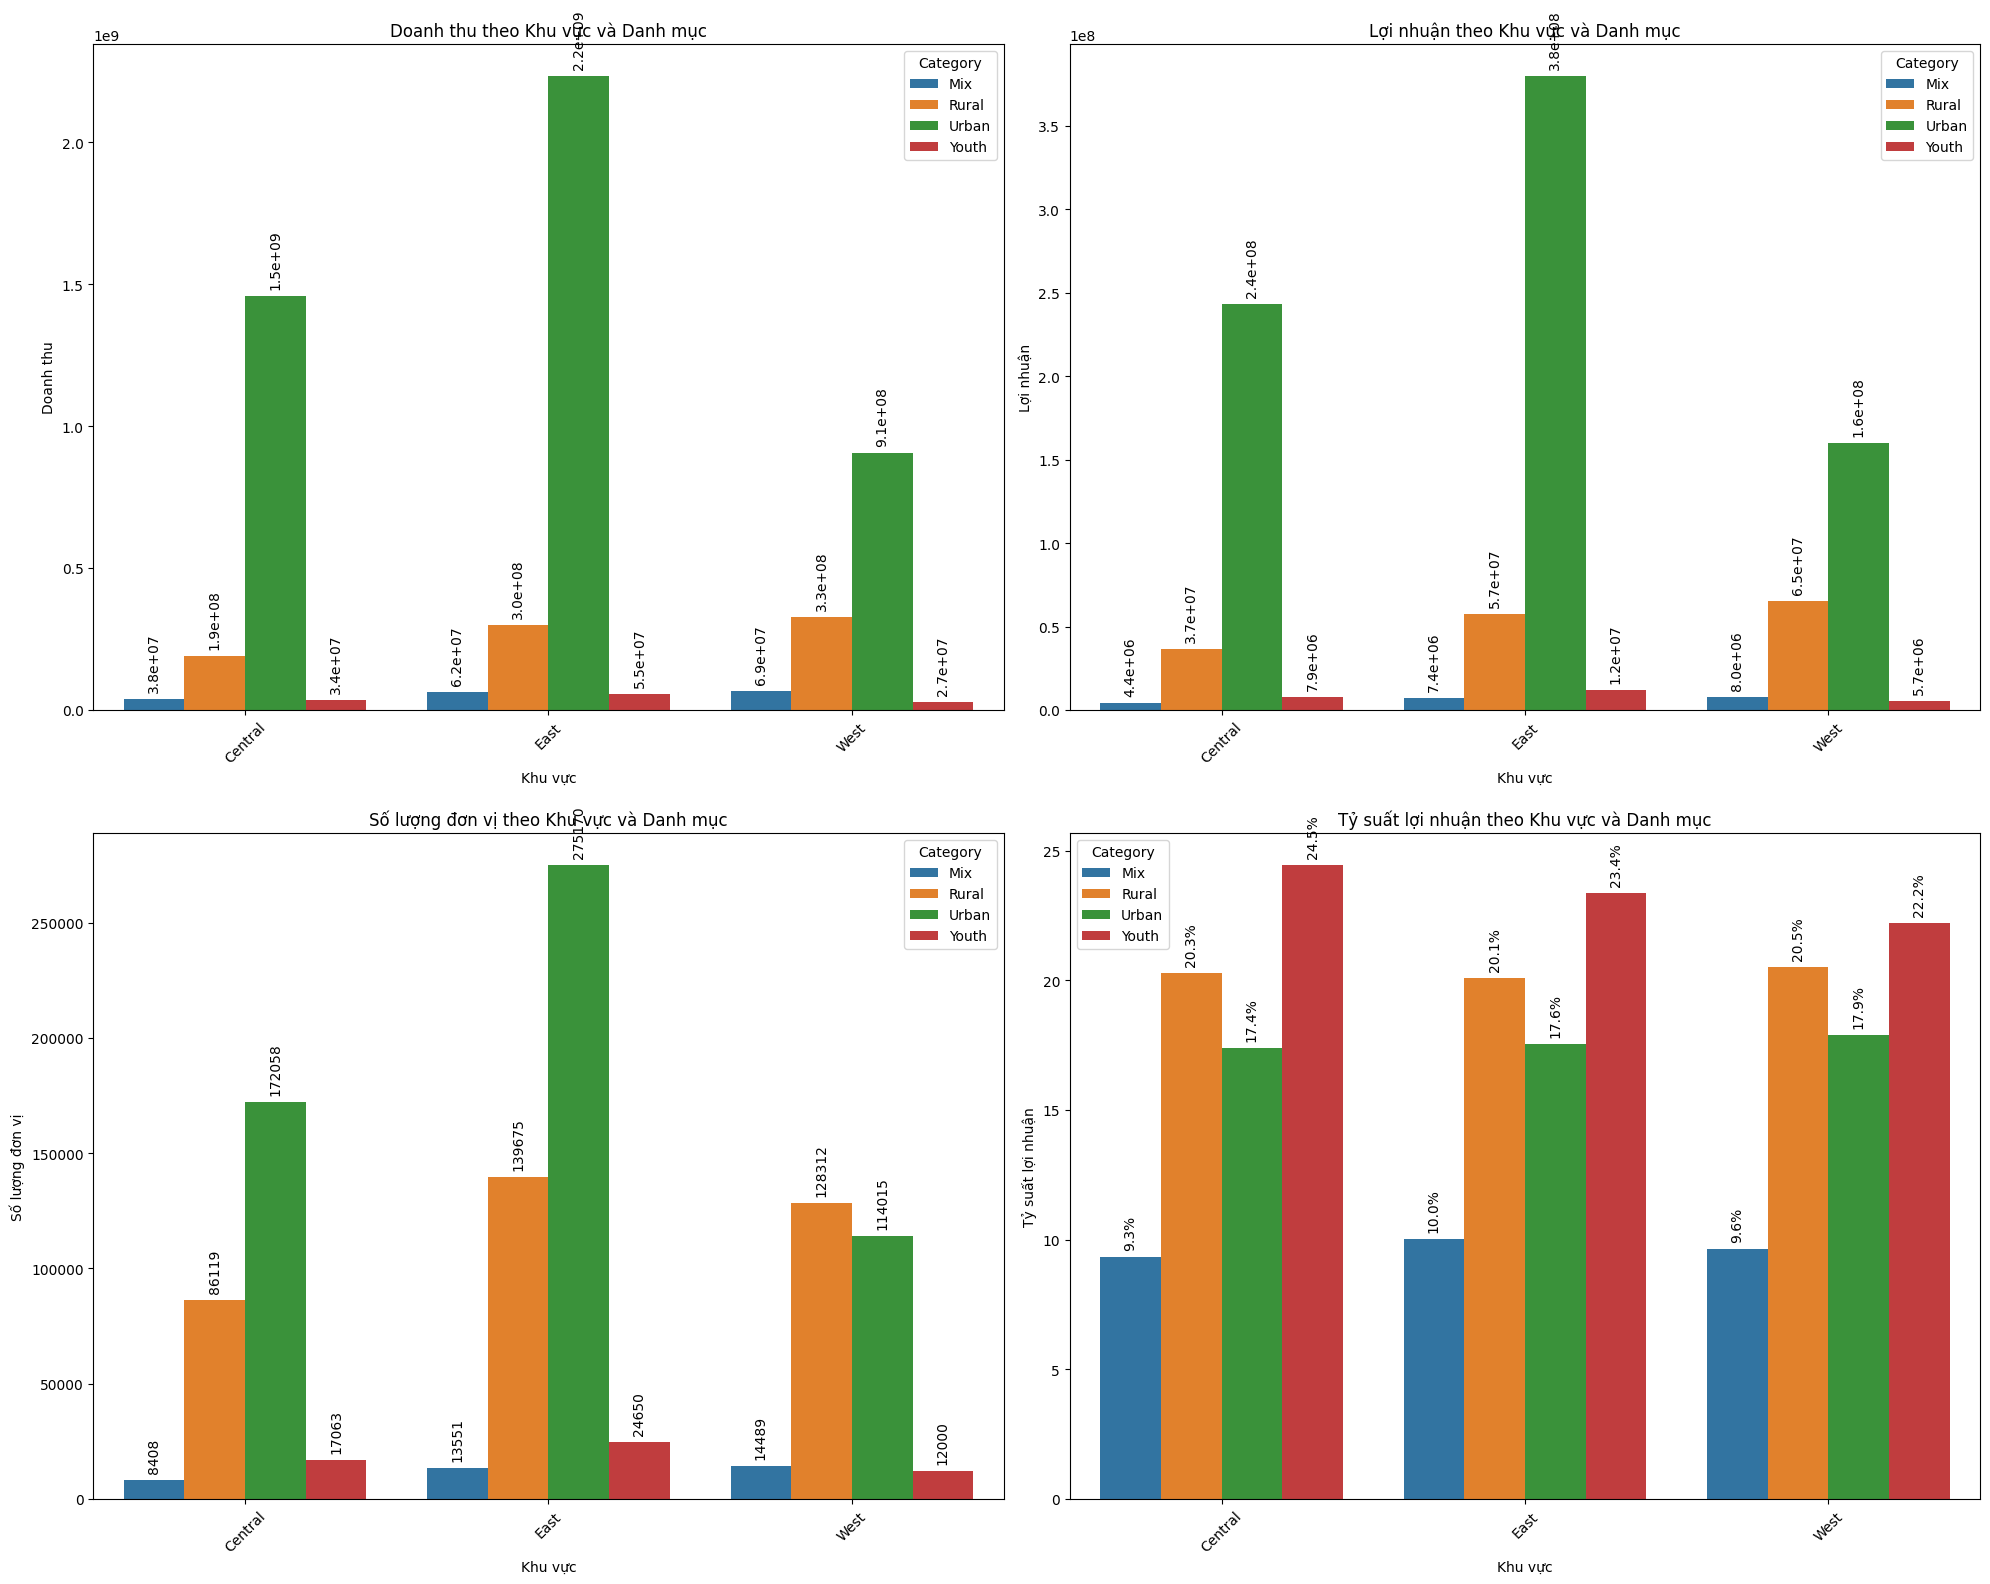

<Figure size 1500x500 with 0 Axes>

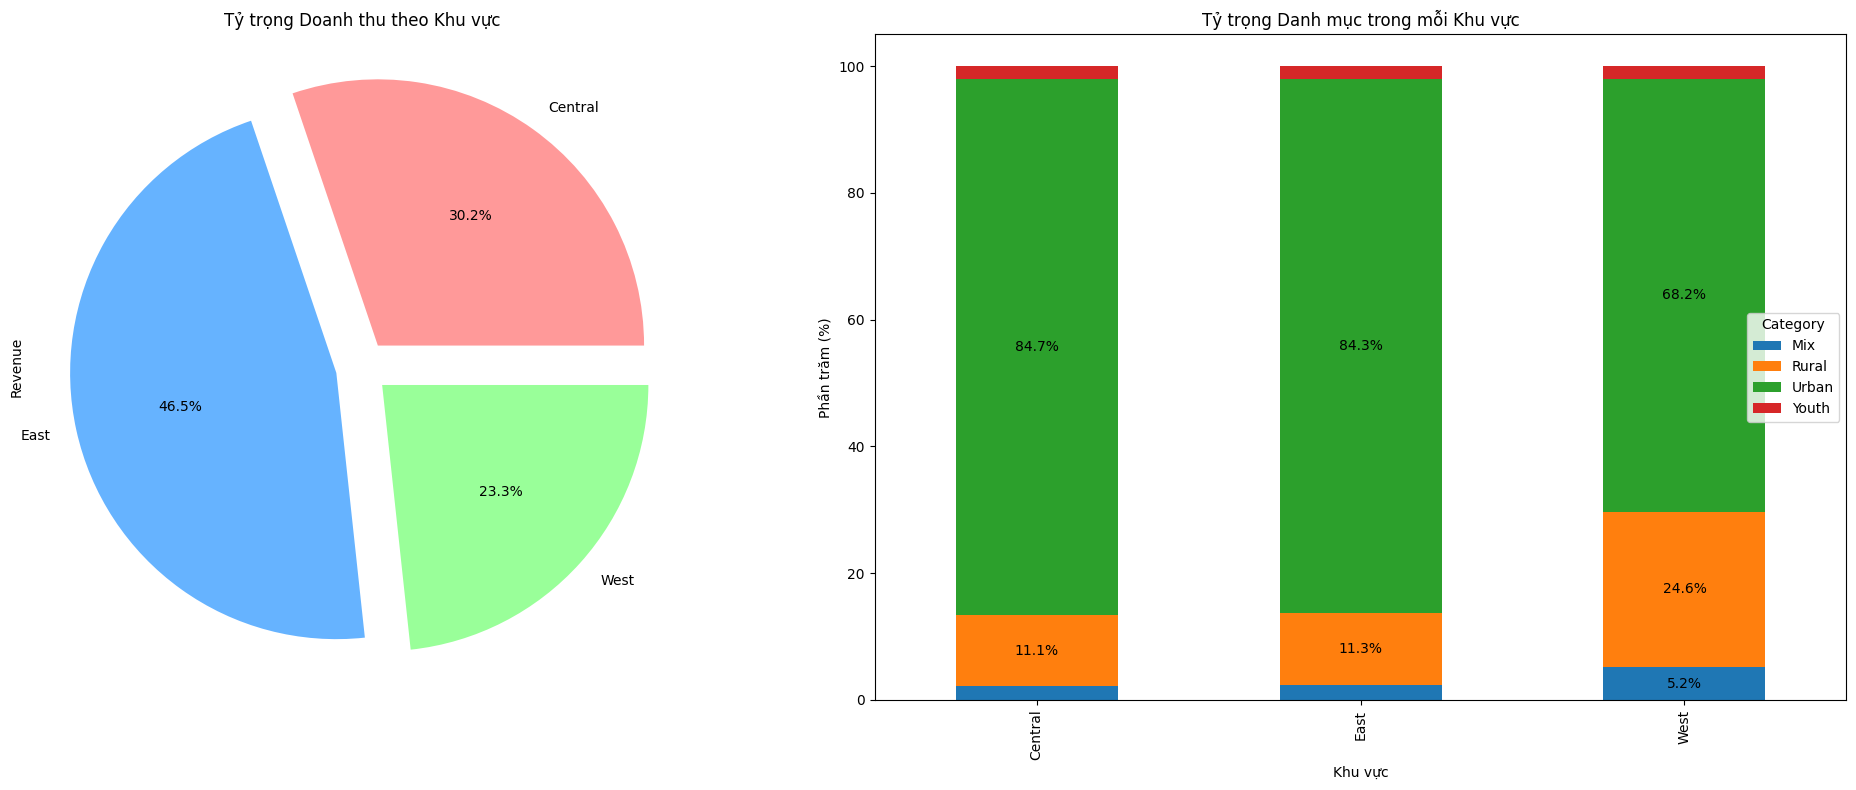


=== Chi tiết số liệu phân tích khu vực và danh mục ===

1. Tổng quan theo khu vực:
              Revenue       Profit   Units
Region                                    
Central  1.720399e+09  292511883.3  283648
East     2.650915e+09  456559753.3  453046
West     1.327236e+09  239209714.2  268816

2. Tỷ trọng doanh thu theo khu vực (%):
Region
Central    30.19
East       46.52
West       23.29
Name: Revenue, dtype: float64

3. Chi tiết metrics theo khu vực và danh mục:

Revenue per Unit:
Region   Category
Central  Mix         4552.53
         Rural       2220.27
         Urban       8465.98
         Youth       2008.65
East     Mix         4602.91
         Rural       2146.74
         Urban       8118.04
         Youth       2225.28
West     Mix         4729.68
         Rural       2540.29
         Urban       7944.54
         Youth       2246.83
Name: Revenue_per_Unit, dtype: float64

Profit Margin (%):
Region   Category
Central  Mix          9.34
         Rural       20.28
         

In [ ]:

# 1.3 Phân tích theo Khu vực và Danh mục Sản phẩm
region_category = (
    df.groupby(["Region", "Category"])
    .agg({"Revenue": "sum", "Profit": "sum", "Units": "sum", "Profit_Margin": "mean"})
    .round(2)
)

print("\n=== 3. Phân tích theo khu vực và danh mục ===")
print("\nThống kê theo khu vực và danh mục:")
print(region_category)

# 1.3.1 Phân tích chi tiết theo Khu vực và Danh mục
# Tạo subplot cho 4 metrics
fig, axes = plt.subplots(2, 2, figsize=(20, 16))
metrics = ["Revenue", "Profit", "Units", "Profit_Margin"]
titles = ["Doanh thu", "Lợi nhuận", "Số lượng đơn vị", "Tỷ suất lợi nhuận"]

for idx, (metric, title) in enumerate(zip(metrics, titles)):
    row = idx // 2
    col = idx % 2

    # Tạo barplot
    sns.barplot(
        data=region_category.reset_index(),
        x="Region",
        y=metric,
        hue="Category",
        ax=axes[row, col],
    )
    # Thêm title và labels
    axes[row, col].set_title(f"{title} theo Khu vực và Danh mục")
    axes[row, col].set_xlabel("Khu vực")
    axes[row, col].set_ylabel(title)
    # Xoay labels
    axes[row, col].tick_params(axis="x", rotation=45)
    # Thêm giá trị lên bars
    for container in axes[row, col].containers:
      if metric in ["Revenue", "Profit"]:
          axes[row, col].bar_label(container, fmt="%.1e", rotation=90,padding=5)
      elif metric == "Units":
          axes[row, col].bar_label(container, fmt="%.0f", rotation=90,padding=5)
      else:
          axes[row, col].bar_label(container, fmt="%.1f%%", rotation=90,padding=5)

plt.tight_layout()
plt.show()

# 1.3.2 Phân tích tỷ trọng theo khu vực
plt.figure(figsize=(15, 5))

# Tính tổng doanh thu theo khu vực
region_totals = region_category.groupby("Region")["Revenue"].sum()

# Tạo subplot
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(20, 8))
# 1. Biểu đồ tròn thể hiện tỷ trọng doanh thu theo khu vực
explode = (0.1, 0.1, 0.1) # tạo khoảng cách giữa các phần
colors = ["#ff9999", "#66b3ff", "#99ff99"]

region_totals.plot(
    kind="pie", autopct="%1.1f%%", explode=explode, colors=colors, ax=ax1
)
ax1.set_title("Tỷ trọng Doanh thu theo Khu vực")

# 2. Biểu đồ cột 100% stacked cho tỷ trọng danh mục trong mỗi khu vực
category_props = region_category.reset_index()
category_props_pct = category_props.pivot_table(
    values="Revenue", index="Region", columns="Category", aggfunc="sum"
).apply(lambda x: x / x.sum() * 100, axis=1)

category_props_pct.plot(kind="bar", stacked=True, ax=ax2)
ax2.set_title("Tỷ trọng Danh mục trong mỗi Khu vực")
ax2.set_xlabel("Khu vực")
ax2.set_ylabel("Phần trăm (%)")

# Thêm giá trị phần trăm
for c in ax2.containers:
    # Thêm nhãn phần trăm
    labels = [f"{v:.1f}%" if v > 5 else "" for v in c.datavalues]
    ax2.bar_label(c, labels=labels, label_type="center")
plt.tight_layout()
plt.show()


# 1.3.4 In số liệu chi tiết cho phân tích khu vực và danh mục
print("\n=== Chi tiết số liệu phân tích khu vực và danh mục ===")
# 1. Tổng quan theo khu vực
print("\n1. Tổng quan theo khu vực:")
region_overview = (
    region_category.groupby("Region")
    .agg({"Revenue": "sum", "Profit": "sum", "Units": "sum"})
    .round(2)
)
print(region_overview)
# 2. Tỷ trọng doanh thu theo khu vực
print("\n2. Tỷ trọng doanh thu theo khu vực (%):")
region_revenue_share = (
    region_overview["Revenue"] / region_overview["Revenue"].sum() * 100
).round(2)
print(region_revenue_share)

# 3. Chi tiết metrics theo khu vực và danh mục
print("\n3. Chi tiết metrics theo khu vực và danh mục:")
region_category_details = region_category.copy()
region_category_details["Revenue_per_Unit"] = (
    region_category_details["Revenue"] / region_category_details["Units"]
)
print("\nRevenue per Unit:")
print(region_category_details["Revenue_per_Unit"].round(2))
print("\nProfit Margin (%):")
print(region_category_details["Profit_Margin"].round(2))

# 4. Tỷ trọng danh mục trong mỗi khu vực
print("\n4. Tỷ trọng danh mục trong mỗi khu vực (%):")
category_share_by_region = (
   region_category.reset_index()
    .pivot_table(values="Revenue", index="Region", columns="Category",aggfunc="sum")
    .apply(lambda x: (x / x.sum() * 100).round(2), axis=1)
)
print(category_share_by_region)

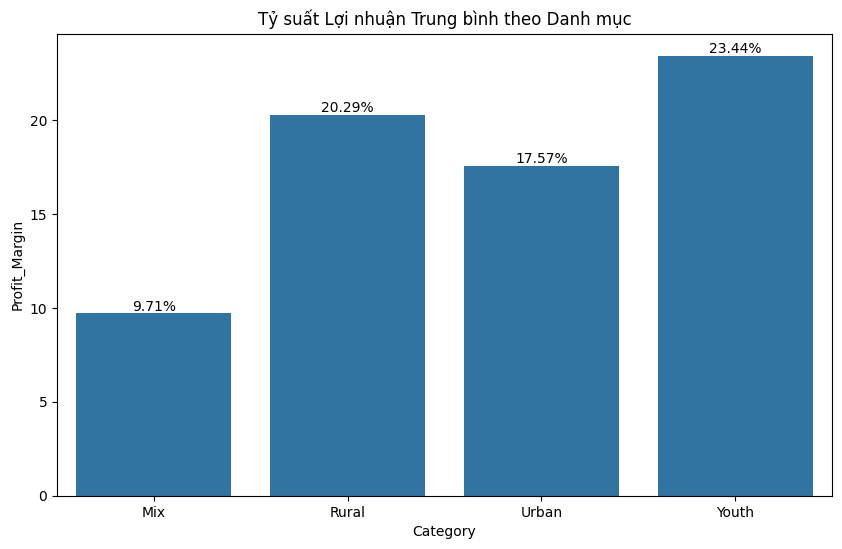


=== 5. Thống kê tổng hợp ===

Thống kê theo danh mục:
               Revenue                          Profit                    \
                   sum     mean      std           sum     mean      std   
Category                                                                   
Mix       1.691800e+08  4755.99  2694.71  1.981004e+07   556.90  1038.22   
Rural     8.170029e+08  2416.00  1942.23  1.592892e+08   471.04   659.16   
Urban     4.596279e+09  8342.17  4556.30  7.838678e+08  1422.71  1708.76   
Youth     1.160887e+08  2252.49  1433.17  2.531434e+07   491.18   542.81   

         Profit_Margin         
                  mean    std  
Category                       
Mix               9.71  16.84  
Rural            20.29  17.16  
Urban            17.57  17.23  
Youth            23.44  16.46  

Thống kê theo khu vực:
              Revenue                          Profit                    \
                  sum     mean      std           sum     mean      std   
Region        

In [ ]:
# 1.5 Phân tích tỷ suất lợi nhuận theo danh mục
profit_margin_category = (
    df.groupby("Category")["Profit_Margin"].mean().round(2).reset_index()
)

# Vẽ biểu đồ với annotation
plt.figure(figsize=(10, 6))
ax = sns.barplot(data=profit_margin_category, x="Category", y="Profit_Margin")
# Thêm giá trị phần trăm vào đỉnh mỗi cột
for i in ax.containers:
    ax.bar_label(i, fmt="%.2f%%")
plt.title("Tỷ suất Lợi nhuận Trung bình theo Danh mục")
plt.show()

# 5. Thống kê tổng hợp
print("\n=== 5. Thống kê tổng hợp ===")
print("\nThống kê theo danh mục:")
category_summary = (
    df.groupby("Category")
    .agg(
        {
            "Revenue": ["sum", "mean", "std"],
            "Profit": ["sum", "mean", "std"],
            "Profit_Margin": ["mean", "std"],
        }
    )
    .round(2)
)
print(category_summary)

print("\nThống kê theo khu vực:")
region_summary = (
    df.groupby("Region")
    .agg(
        {
            "Revenue": ["sum", "mean", "std"],
            "Profit": ["sum", "mean", "std"],
            "Profit_Margin": ["mean", "std"],
        }
    )
    .round(2)
)
print(region_summary)


=== 4. Top 10 sản phẩm có doanh thu cao nhất ===

Top 10 sản phẩm:
                    Revenue       Profit  Units  Profit_Margin
Product                                                       
Maximus UM-92  1.252895e+08  19169297.62   9623          15.30
Natura UM-10   1.105254e+08  -4045228.91   8682          -3.66
Maximus UM-43  1.069199e+08  45964855.81   9124          42.99
Maximus UM-11  1.062485e+08   7157188.17   6847           6.64
Maximus UM-54  1.019789e+08  10697581.80   8093          10.49
Maximus UM-01  9.775061e+07   5290410.66   8759           5.48
Maximus UM-80  8.110847e+07  16505574.52   6434          20.35
Maximus UM-96  7.797357e+07  -4530264.29   7050          -5.81
Maximus UM-12  7.088998e+07    907282.21   3522           1.24
Maximus UC-69  6.658026e+07  21631927.42  10852          32.49


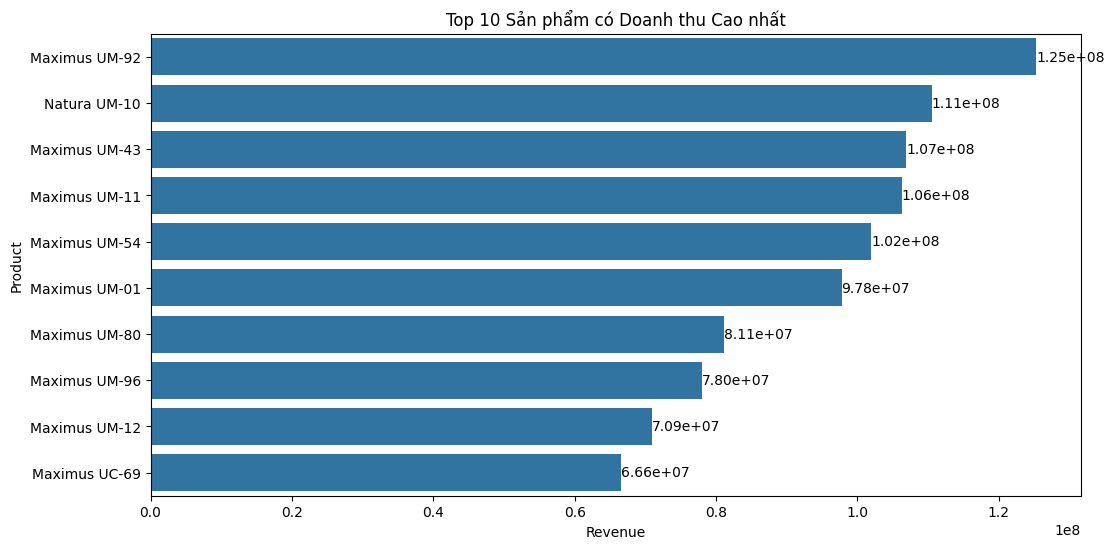

In [ ]:
# 1.4 Top 10 sản phẩm
top_products = (
    df.groupby("Product")
    .agg({"Revenue": "sum", "Profit": "sum", "Units": "sum", "Profit_Margin":"mean"})
    .sort_values("Revenue", ascending=False)
    .head(10)
    .round(2)
)

print("\n=== 4. Top 10 sản phẩm có doanh thu cao nhất ===")
print("\nTop 10 sản phẩm:")
print(top_products)

# Vẽ biểu đồ với annotation
plt.figure(figsize=(12, 6))
ax = sns.barplot(data=top_products.reset_index(), x="Revenue", y="Product")
# Thêm giá trị vào cuối mỗi thanh
for i in ax.containers:
    ax.bar_label(i, fmt="%.2e")
plt.title("Top 10 Sản phẩm có Doanh thu Cao nhất")
plt.show()

1. Tổng quan theo khu vực
  + Doanh thu:
    - Khu vực East có doanh thu cao nhất (2.650915e+09), chiếm 46.52% tổng doanh thu.
    - Tiếp theo là khu vực Central (1.720399e+09, chiếm 30.19%) và West (1.327236e+09, chiếm 23.29%).
  + Lợi nhuận:
    - Khu vực East cũng dẫn đầu về lợi nhuận (4.565598e+08), tiếp theo là Central (2.925119e+08) và West (2.392097e+08).
  + Số lượng đơn vị bán ra:
    - Khu vực East bán được nhiều đơn vị nhất (453,046), tiếp theo là Central (283,648) và West (268,816).

2. Phân tích theo danh mục
  + Doanh thu:
    - Danh mục Urban có doanh thu cao nhất (4.596279e+09), chiếm tỷ trọng lớn nhất trong cả ba khu vực (Central: 84.67%, East: 84.27%, West: 68.25%).
    - Danh mục Rural đứng thứ hai về doanh thu (8.170029e+08), trong khi Youth và Mix có doanh thu thấp hơn.
  + Lợi nhuận:
    - Danh mục Urban cũng đóng góp lợi nhuận lớn nhất (7.838678e+08), tiếp theo là Rural (1.592892e+08).
    - Youth có tỷ suất lợi nhuận (Profit Margin) cao nhất (23.44%), tiếp theo là Rural (20.29%) và Urban (17.57%).
  + Số lượng đơn vị bán ra:
    - Urban bán được nhiều đơn vị nhất (551,243), tiếp theo là Rural (348,106) và Youth (53,713).

3. Phân tích chi tiết theo khu vực và danh mục
  + Doanh thu trên mỗi đơn vị:
    - Urban có doanh thu trên mỗi đơn vị cao nhất (Central: 8465.98, East: 8118.04, West: 7944.54).
    - Mix và Youth có doanh thu trên mỗi đơn vị thấp hơn, dao động từ 2008.65 đến 4729.68.
  + Tỷ suất lợi nhuận:
    - Youth có tỷ suất lợi nhuận cao nhất (Central: 24.46%, East: 23.35%, West: 22.20%).
    - Rural và Urban có tỷ suất lợi nhuận tương đối ổn định, khoảng 20% và 17-18%.
    - Mix có tỷ suất lợi nhuận thấp nhất (khoảng 9-10%).

4. Tỷ trọng danh mục trong mỗi khu vực
  + Urban chiếm tỷ trọng lớn nhất trong cả ba khu vực:
    - Central: 84.67%
    - East: 84.27%
    - West: 68.25%
  + Rural đứng thứ hai, chiếm khoảng 11-24% tùy khu vực.
  + Mix và Youth chiếm tỷ trọng nhỏ (dưới 5%).

5. Phân tích Top 10 sản phẩm
  + Doanh thu:
    - Sản phẩm Maximus UM-92 có doanh thu cao nhất (1.252895e+08), tiếp theo là Natura UM-10 (1.105254e+08) và Maximus UM-43 (1.069199e+08).
  + Lợi nhuận:
    - Maximus UM-43 có lợi nhuận cao nhất (45,964,855.81), với tỷ suất lợi nhuận 42.99%.
    - Natura UM-10 và Maximus UM-96 có lợi nhuận âm, cho thấy hiệu quả kinh doanh kém.
  + Tỷ suất lợi nhuận:
    - Maximus UM-43 có tỷ suất lợi nhuận cao nhất (42.99%), tiếp theo là Maximus UC-69 (32.49%) và Maximus UM-80 (20.35%).

6. Nhận định chung
  + Khu vực East là thị trường chính, đóng góp gần một nửa doanh thu và lợi nhuận.
  + Danh mục Urban là động lực chính của doanh thu và lợi nhuận, nhưng Youth lại có tỷ suất lợi nhuận cao nhất.
  + Mix và Youth có tiềm năng phát triển nếu được tập trung đầu tư và cải thiện hiệu quả kinh doanh.
  + Một số sản phẩm như Natura UM-10 và Maximus UM-96 cần được đánh giá lại để cải thiện lợi nhuận.

7. Gợi ý chiến lược
  + Tập trung vào khu vực East và danh mục Urban để duy trì doanh thu và lợi nhuận.
  + Đầu tư vào danh mục Youth để tận dụng tỷ suất lợi nhuận cao.
  + Cải thiện hiệu quả kinh doanh của các sản phẩm có lợi nhuận thấp hoặc âm (ví dụ: Natura UM-10, Maximus UM-96).
  + Phân tích sâu hơn về nguyên nhân tại sao Mix có tỷ suất lợi nhuận thấp và đề xuất giải pháp cải thiện

